# **Exploratory Data Analysis (EDA) on Accident Dataset**

# Introduction
This notebook focuses on performing an Exploratory Data Analysis (EDA) on a dataset containing accident-related information. The goal is to uncover insights, identify trends, and analyze statistical relationships between variables. Key tasks include data cleaning, visualization, and statistical analysis.


# Abstract

Road safety is a global concern, with accidents causing significant loss of life and economic damage. This project analyzes accident-related data to uncover patterns that can inform safety measures. By applying exploratory data analysis (EDA), we explore factors such as accident severity, time-of-day trends, and environmental influences like weather and road conditions.

The analysis includes correlation and covariance methods to explore relationships between key variables like accident severity, vehicle involvement, and road types. Various graphical tools, including heatmaps, pie charts, box plots, and scatter plots, were used to visualize the data.

Key findings reveal peak accident times, high-risk weather conditions, and road types with higher accident severity. This data-driven approach aims to support policymakers and road safety experts in creating more effective safety strategies, ultimately contributing to safer roads for all.


# Essential Libraries and Data

In this section, we import the necessary libraries to perform Exploratory Data Analysis (EDA) and load the accident dataset for analysis.

## Libraries

We use the following libraries:
- **Pandas**: For data manipulation and analysis.
- **NumPy**: For numerical operations.
- **Seaborn**: For statistical data visualization.
- **Matplotlib**: For general data visualization and plotting.

## Loading Data

The dataset is loaded using **Pandas'** `read_csv` function, which allows us to read data from a CSV file. The dataset contains accident-related data, including variables such as accident severity, time, weather conditions, road types, and more.



In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\DATASCIENCE\dataset\datasetbrazil.csv")

## Data Cleaning
This section focuses on handling missing values, correcting data types, and preparing the dataset for analysis.


In [46]:
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['hour'])

# Drop the original Date and hour columns (optional)
data = df.drop(columns=['Date', 'hour'])

# Display the resulting DataFrame
print(data.head())

  week_day state  road_id     km              city  \
0   friday    BA    324.0    526  FEIRA DE SANTANA   
1   friday    MS     60.0  160,6           CAMAPUA   
2   friday    PE    101.0     44          IGARASSU   
3   friday    PB    230.0     19       JOAO PESSOA   
4   friday    RJ    101.0    330    RIO DE JANEIRO   

                                   cause_of_accident  \
0  Driver failed to keep distance from the vehicl...   
1                                Driver was sleeping   
2  Acessing the road without seeing the presence ...   
3  Driver failed to keep distance from the vehicl...   
4                          Driver's lack of reaction   

                 type_of_accident     victims_condition weather_timestamp  \
0              Rear-end collision  With injured victims               Day   
1               Head-on collision  With injured victims               Day   
2             Broadside collision  With injured victims               Day   
3  Chain reaction crash (pile-

In [47]:
data.dtypes

week_day                      object
state                         object
road_id                      float64
km                            object
city                          object
cause_of_accident             object
type_of_accident              object
victims_condition             object
weather_timestamp             object
road_direction                object
wheather_condition            object
road_type                     object
road_delineation              object
people                         int64
deaths                         int64
slightly_injured               int64
severely_injured               int64
uninjured                      int64
ignored                        int64
total_injured                  int64
vehicles_involved              int64
latitude                     float64
longitude                    float64
regional                      object
police_station                object
datetime              datetime64[ns]
dtype: object

In [48]:
data.drop_duplicates

<bound method DataFrame.drop_duplicates of        week_day state  road_id     km                city  \
0        friday    BA    324.0    526    FEIRA DE SANTANA   
1        friday    MS     60.0  160,6             CAMAPUA   
2        friday    PE    101.0     44            IGARASSU   
3        friday    PB    230.0     19         JOAO PESSOA   
4        friday    RJ    101.0    330      RIO DE JANEIRO   
...         ...   ...      ...    ...                 ...   
1008   thursday    PR    116.0   89,5           PIRAQUARA   
1009  wednesday    ES    101.0    271               SERRA   
1010   thursday    PI    343.0    478    ANGICAL DO PIAUI   
1011   saturday    RJ    116.0    173  SAO JOAO DE MERITI   
1012     sunday    RS    392.0   96,8       MORRO REDONDO   

                                      cause_of_accident  \
0     Driver failed to keep distance from the vehicl...   
1                                   Driver was sleeping   
2     Acessing the road without seeing the pres

In [49]:
data.shape

(1013, 26)

In [50]:
data.isnull().sum()

week_day               0
state                  0
road_id                5
km                     5
city                   0
cause_of_accident      0
type_of_accident       0
victims_condition      0
weather_timestamp      0
road_direction         0
wheather_condition     0
road_type              0
road_delineation       0
people                 0
deaths                 0
slightly_injured       0
severely_injured       0
uninjured              0
ignored                0
total_injured          0
vehicles_involved      0
latitude               0
longitude              0
regional               0
police_station        15
datetime               0
dtype: int64

In [51]:
dframe = data.dropna() 

In [52]:
dframe.head(1)

,week_day,state,road_id,km,city,cause_of_accident,type_of_accident,victims_condition,weather_timestamp,road_direction,...,severely_injured,uninjured,ignored,total_injured,vehicles_involved,latitude,longitude,regional,police_station,datetime
0,friday,BA,324.0,526,FEIRA DE SANTANA,Driver failed to keep distance from the vehicl...,Rear-end collision,With injured victims,Day,Decreasing,...,0,1,0,2,2,-12.3064,-38.89052,SPRF-BA,DEL01-BA,2023-08-25 13:00:00


In [53]:
dframe = dframe.drop(columns=['latitude', 'longitude']) 


In [54]:
dframe.shape

(993, 24)

# Statistical Analysis

In this section, we perform a statistical analysis to explore relationships between different variables in the dataset. This includes calculating correlation and covariance, which are key to understanding the dependencies between variables, as well as performing additional tests to assess trends and associations.








In [55]:
numeric_data = dframe.select_dtypes(include=['float64', 'int64'])

In [56]:
stat_an=numeric_data.describe()

# Correlation Analysis

In this part of the analysis, we compute the correlation matrix for the numeric variables in the dataset. Correlation helps in understanding the relationship between two or more variables. It indicates whether and how strongly pairs of variables are related. The `corr()` function in Pandas is used to compute the pairwise correlation of columns in the DataFrame. A correlation value close to 1 or -1 indicates a strong relationship, while a value near 0 indicates no correlation.

In [57]:
corelation=numeric_data.corr()

# Covariance Analysis

Covariance is a statistical measure that helps in understanding how two variables change together. Unlike correlation, covariance does not normalize the values, so the magnitude depends on the units of the variables. A positive covariance means that both variables tend to increase together, while a negative covariance indicates that one variable increases when the other decreases. The `cov()` function in Pandas is used to calculate the covariance matrix between numeric columns in the DataFrame.



In [58]:
covarience=numeric_data.cov()

In [59]:
print(stat_an)
print(corelation)
print(covarience)
print(dframe.head(1))
print(dframe.tail(1))

          road_id      people      deaths  slightly_injured  severely_injured  \
count  993.000000  993.000000  993.000000        993.000000        993.000000   
mean   212.269889    2.333333    0.065458          0.907351          0.325277   
std    133.018643    1.657907    0.267050          0.955394          0.583662   
min     10.000000    1.000000    0.000000          0.000000          0.000000   
25%    101.000000    1.000000    0.000000          0.000000          0.000000   
50%    153.000000    2.000000    0.000000          1.000000          0.000000   
75%    343.000000    3.000000    0.000000          1.000000          1.000000   
max    493.000000   29.000000    2.000000          7.000000          4.000000   

        uninjured     ignored  total_injured  vehicles_involved  
count  993.000000  993.000000     993.000000         993.000000  
mean     0.869084    0.166163       1.232628           1.570997  
std      1.486831    0.434852       0.966820           0.626405  
min   

In [60]:
print(dframe.dtypes)
print(dframe.isnull().sum())

week_day                      object
state                         object
road_id                      float64
km                            object
city                          object
cause_of_accident             object
type_of_accident              object
victims_condition             object
weather_timestamp             object
road_direction                object
wheather_condition            object
road_type                     object
road_delineation              object
people                         int64
deaths                         int64
slightly_injured               int64
severely_injured               int64
uninjured                      int64
ignored                        int64
total_injured                  int64
vehicles_involved              int64
regional                      object
police_station                object
datetime              datetime64[ns]
dtype: object
week_day              0
state                 0
road_id               0
km                    0
ci

# Basic Exploratory Data Analysis (EDA) Questions

In this section, we will explore basic descriptive statistics and trends in the dataset. These questions help us understand the overall distribution and relationships between key features in the data.

##### 1. Which state has the highest number of accidents?
We will find the state with the highest frequency of accidents by counting the number of accidents for each state and determining the state with the maximum value.

##### 2. What is the most common cause of accidents?
By examining the `cause_of_accident` column, we will identify the most frequent accident causes using the value counts.

##### 3. What is the most frequent type of accident?
We will analyze the `type_of_accident` column to determine the most common accident types by counting the occurrences of each type.

##### 4. How many accidents resulted in fatalities?
We will calculate the total number of fatalities from the `deaths` column to understand the number of accidents that resulted in fatalities.

##### 5. What is the average number of people involved in accidents?
We will calculate the average number of people involved in accidents using the `people` column, providing insight into the average accident size.

##### 6. Which road type is most commonly associated with accidents?
By analyzing the `road_type` column, we will identify the most common road types where accidents occur using value counts.

##### 7. What weather condition is most frequently associated with accidents?
We will identify the most common weather conditions associated with accidents by counting the occurrences in the `wheather_condition` column.

##### 8. What is the distribution of accidents across different regions?
We will visualize the distribution of accidents across different regions by analyzing the `regional` column, which will help us identify which regions have the highest frequency of accidents.

##### 9. How many accidents involved more than 5 vehicles?
We will filter the dataset to count accidents where more than 5 vehicles were involved using the `vehicles_involved` column.

##### 10. What is the average number of deaths per accident?
We will calculate the average number of deaths per accident by dividing the total number of deaths by the total number of accidents.

##### 11. Which city has the highest number of accidents?
We will find the city with the highest number of accidents by analyzing the `city` column and determining the city with the most accident records.

##### 12. Which type of accident happens most frequently during the night hours (6 PM - 6 AM)?
By filtering the dataset based on time and accident type, we will determine the most frequent type of accident that occurs at night, based on the `datetime` and `type_of_accident` columns.

##### 13. What percentage of accidents involved severely injured victims?
We will calculate the percentage of accidents where there were severely injured victims using the `severely_injured` column.

##### 14. How many accidents occurred on weekends vs weekdays?
We will count the number of accidents that occurred on weekends versus weekdays using the `week_day` column.

##### 15. At which time of day do accidents occur the most?
We will determine the time of day with the highest number of accidents by analyzing the `hour` column extracted from the `datetime` column.

##### 16. What is the most common day of the week for accidents?
We will find the day of the week that has the highest number of accidents by analyzing the `week_day` column and finding the most frequent day.

##### 17. Which hour of the day sees the highest number of accidents?
By grouping accidents by hour, we will determine the specific hour of the day that has the highest accident frequency.

##### 18. Are accidents more frequent on weekdays or weekends?
We will compare the frequency of accidents occurring on weekdays versus weekends using the `week_day` column and analyze the results.

##### 19. What is the peak time for accidents? (e.g., early morning, evening)
By grouping accidents by time of day, we will identify the peak times when accidents occur, such as early mornings, afternoons, or evenings.

##### 20. What is the most common type of accident in each city?
We will analyze the most common type of accident in each city by grouping the data by `city` and determining the most frequent accident type for each group.


In [61]:
print(dframe.info())
print(dframe.head())
print(dframe.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 993 entries, 0 to 1012
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   week_day            993 non-null    object        
 1   state               993 non-null    object        
 2   road_id             993 non-null    float64       
 3   km                  993 non-null    object        
 4   city                993 non-null    object        
 5   cause_of_accident   993 non-null    object        
 6   type_of_accident    993 non-null    object        
 7   victims_condition   993 non-null    object        
 8   weather_timestamp   993 non-null    object        
 9   road_direction      993 non-null    object        
 10  wheather_condition  993 non-null    object        
 11  road_type           993 non-null    object        
 12  road_delineation    993 non-null    object        
 13  people              993 non-null    int64        

The highest accident occured state is MG with 137 accidents


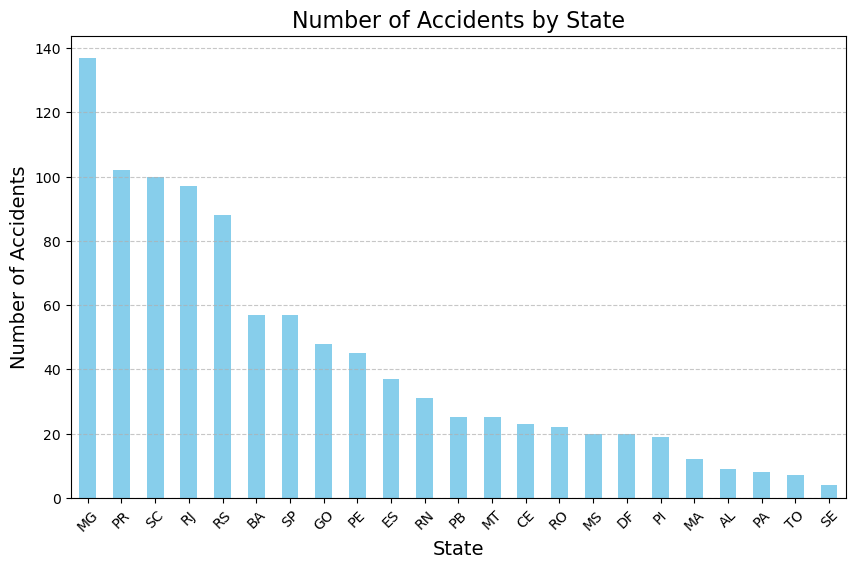

In [62]:
# 1. Which state has the highest number of accidents?

state_accidents=dframe['state'].value_counts()
highest_accident_state=state_accidents.idxmax()

count=state_accidents[highest_accident_state]

print(f"The highest accident occured state is {highest_accident_state} with {count} accidents")

state_accidents.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Number of Accidents by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Most common cause of accidents is Driver's lack of reaction


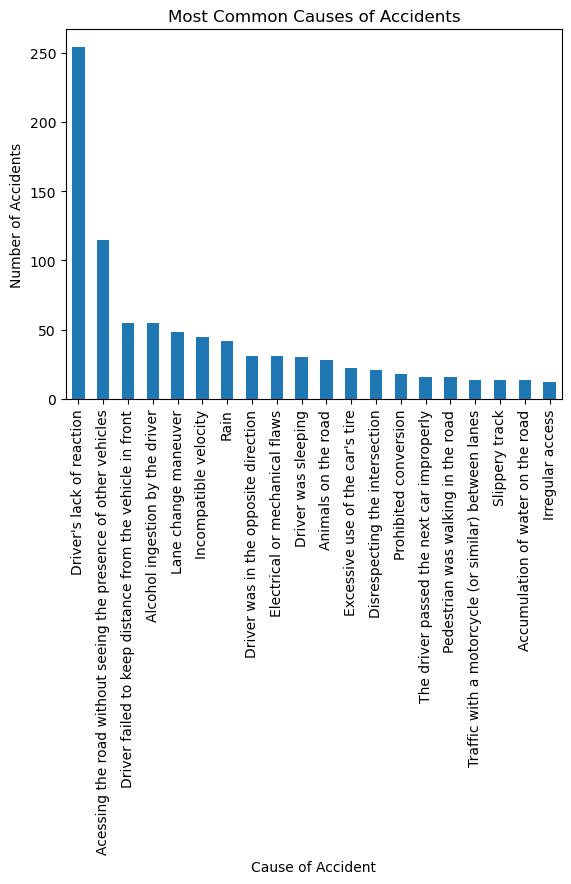

In [63]:
# 2. What is the most common cause of accidents?

accidents_count=dframe['cause_of_accident'].value_counts()

highest_occured_accident=accidents_count.idxmax()
print(f"Most common cause of accidents is {highest_occured_accident}")

cause_counts = dframe['cause_of_accident'].value_counts().head(20)
cause_counts.plot(kind='bar', title='Most Common Causes of Accidents')
plt.xlabel('Cause of Accident')
plt.ylabel('Number of Accidents')
plt.show()

Most frequent type of accident Rear-end collision


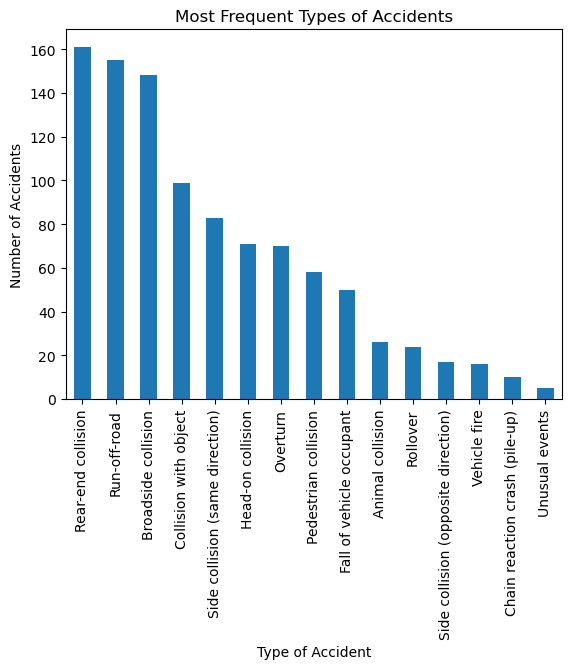

In [64]:
# 3. What is the most frequent type of accident?

accidenttype_counts= dframe['type_of_accident'].value_counts()

most_common_accident=accidenttype_counts.idxmax()

print(f"Most frequent type of accident {most_common_accident}")

# Plot bar graph for most frequent types of accidents
accident_type_counts = dframe['type_of_accident'].value_counts()
accident_type_counts.plot(kind='bar', title='Most Frequent Types of Accidents')
plt.xlabel('Type of Accident')
plt.ylabel('Number of Accidents')
plt.show()


The number of accidents that resulted in fatalities is : 60


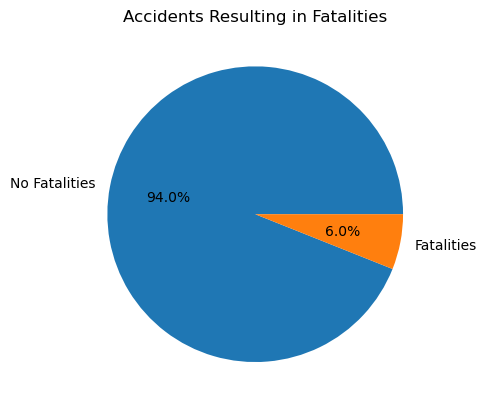

In [65]:
# 4. How many accidents resulted in fatalities

fatal_accidents=dframe[dframe['deaths']>0]

num_fatal_accidents=len(fatal_accidents)

print(f"The number of accidents that resulted in fatalities is : {num_fatal_accidents}")

# Plot pie chart for accidents with fatalities vs without
fatalities = dframe['deaths'] > 0
fatality_counts = fatalities.value_counts()
fatality_counts.plot(kind='pie', labels=['No Fatalities', 'Fatalities'], autopct='%1.1f%%', title='Accidents Resulting in Fatalities')
plt.ylabel('')
plt.show()



The average number of people involved in accidents : 2.3333333333333335


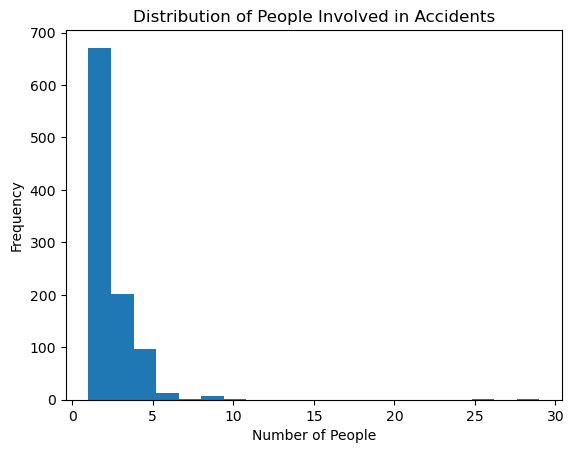

In [66]:
# 5. What is the average number of people involved in accidents?

average_people_involved=dframe['people'].mean()
print(f"The average number of people involved in accidents : {average_people_involved}")

# Simple bar graph for total people involved
dframe['people'].plot(kind='hist', title='Distribution of People Involved in Accidents', bins=20)
plt.xlabel('Number of People')
plt.ylabel('Frequency')
plt.show()


most commonly associated with accidents is Simple


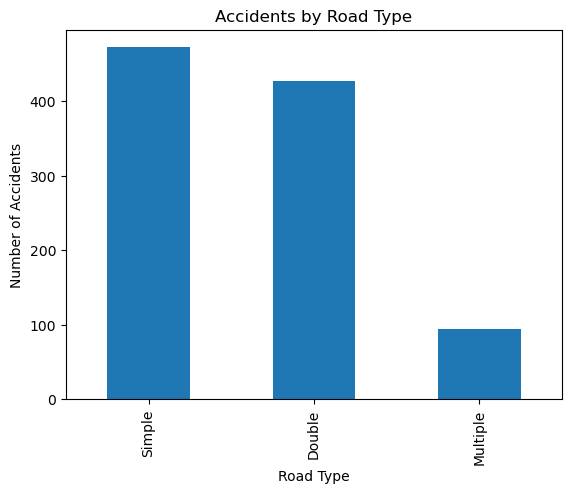

In [67]:
# 6. Which road type is most commonly associated with accidents?

type_of_road=dframe['road_type'].value_counts()

most_accident_occured_road=type_of_road.idxmax()

print(f"most commonly associated with accidents is {most_accident_occured_road}")

# Bar graph for road types
road_type_counts = dframe['road_type'].value_counts()
road_type_counts.plot(kind='bar', title='Accidents by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.show()


Clear sky


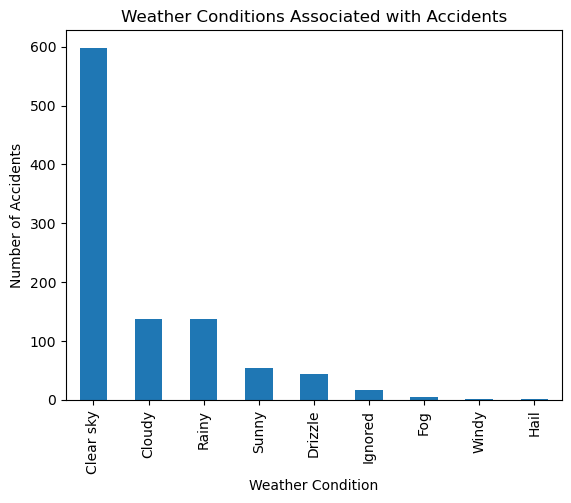

In [68]:
# 7. What weather condition is most frequently associated with accidents ?

weather=dframe['wheather_condition'].value_counts()

most_occured_weather=weather.idxmax()

print(most_occured_weather)

# Bar graph for weather conditions
weather_counts = dframe['wheather_condition'].value_counts()
weather_counts.plot(kind='bar', title='Weather Conditions Associated with Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.show()



SPRF-MG    137
SPRF-PR    102
SPRF-SC    100
SPRF-RJ     97
SPRF-RS     88
SPRF-SP     57
SPRF-BA     53
SPRF-PE     46
SPRF-ES     37
SPRF-GO     35
SPRF-DF     33
SPRF-RN     31
SPRF-MT     25
SPRF-PB     25
SPRF-CE     23
SPRF-RO     22
SPRF-MS     20
SPRF-PI     19
SPRF-MA     12
SPRF-AL      9
SPRF-PA      8
SPRF-SE      7
SPRF-TO      7
Name: regional, dtype: int64


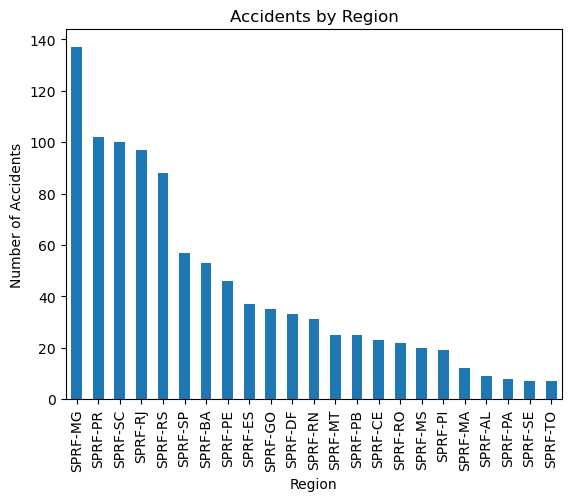

In [69]:
# 8.What is the distribution of accidents across different regions ?

regional_accidents=dframe['regional'].value_counts()

print(regional_accidents)

region_counts = dframe['regional'].value_counts()
region_counts.plot(kind='bar', title='Accidents by Region')
plt.xlabel('Region')
plt.ylabel('Number of Accidents')
plt.show()


510


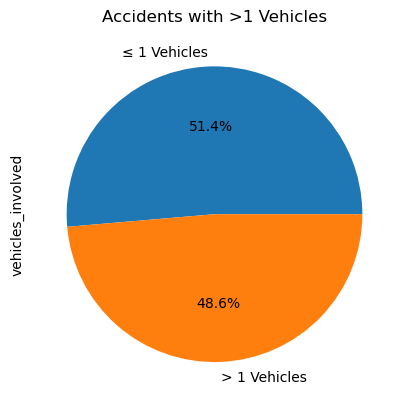

In [70]:
# 9.How many accidents involved more than 2 vehicles ?

accidents_more_than_1_vehicles = dframe[dframe['vehicles_involved'] > 1 ].shape[0]
print(accidents_more_than_1_vehicles)

# Pie chart for accidents with more than 1 vehicles
more_than_1 = dframe['vehicles_involved'] > 1
more_than_1_counts = more_than_1.value_counts()
more_than_1_counts.plot(kind='pie', labels=['≤ 1 Vehicles', '> 1 Vehicles'], autopct='%1.1f%%', title='Accidents with >1 Vehicles')

plt.show()


The average number of deaths per accident is: 0.06545820745216516


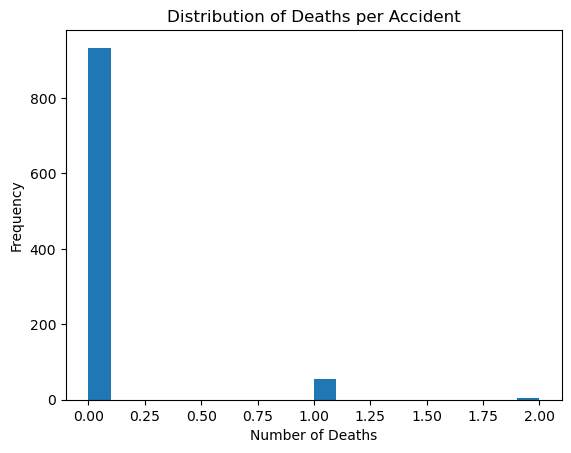

In [71]:
# 10. What is the average number of deaths per accident?

average_deaths_per_accident = dframe['deaths'].mean()
print(f"The average number of deaths per accident is: {average_deaths_per_accident}")

# Bar graph for deaths per accident
dframe['deaths'].plot(kind='hist', title='Distribution of Deaths per Accident', bins=20)
plt.xlabel('Number of Deaths')
plt.ylabel('Frequency')
plt.show()



The city with the highest number of accidents is BRASILIA with 20 accidents.


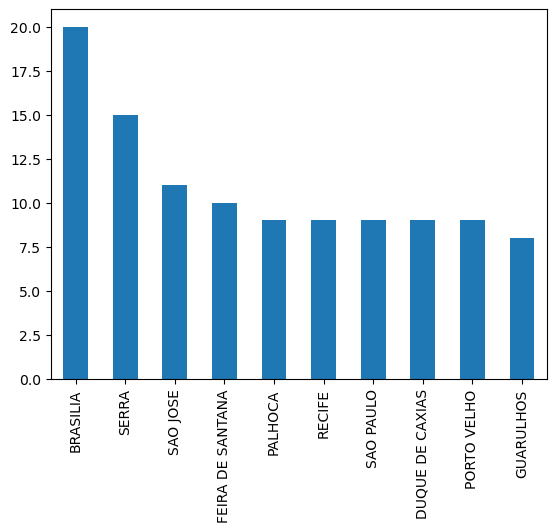

In [72]:
# 11. Which city has the highest number of accidents?

cities=dframe['city'].value_counts().head(10)
highest_accident_occuring_city=cities.idxmax()

count = cities[highest_accident_occuring_city]

print(f"The city with the highest number of accidents is {highest_accident_occuring_city} with {count} accidents.")

cities.plot(kind='bar')
plt.show()

The most common type of accident at night is Rear-end collision with 72 occurrences.


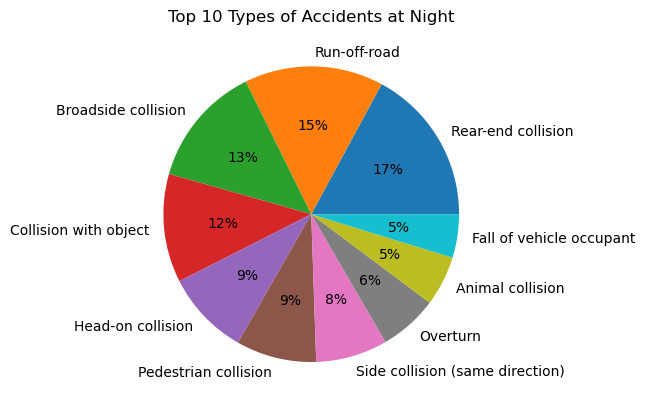

In [73]:
# 12. Which type of accident happens most frequently during the night hours (6 PM - 6 AM)?


night_accidents=dframe[(dframe['datetime'].dt.hour >= 18 ) | (dframe['datetime'].dt.hour <=6)]

night_accidents_type=night_accidents['type_of_accident'].value_counts().head(10)
highest_accident_type=night_accidents_type.idxmax()
count=night_accidents_type[highest_accident_type]

print(f"The most common type of accident at night is {highest_accident_type} with {count} occurrences.")

night_accidents_type.plot(kind='pie',autopct='%1.0f%%',title='Top 10 Types of Accidents at Night')
plt.ylabel('')
plt.show()


27.59% of accidents involved severely injured victims.


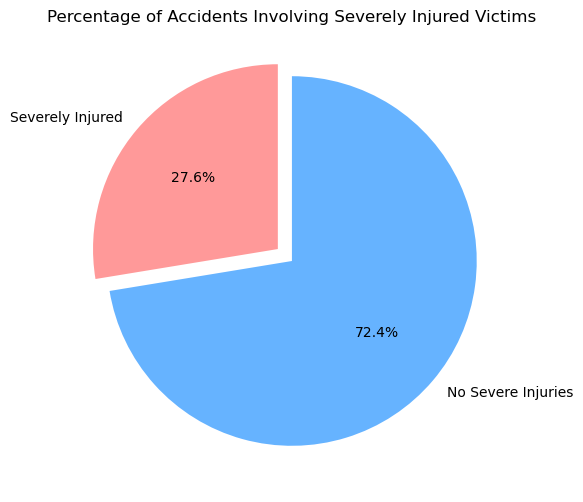

In [74]:
# 13: What percentage of accidents involved severely injured victims?

total_accidents = len(dframe)
severe_injured_count = len(dframe[dframe['severely_injured'] > 0])
percentage_accidents = (severe_injured_count / total_accidents) * 100

print(f"{percentage_accidents:.2f}% of accidents involved severely injured victims.")

plt.figure(figsize=(8, 6))
labels = ['Severely Injured', 'No Severe Injuries']
sizes = [severe_injured_count, total_accidents - severe_injured_count]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)

plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors, 
    explode=explode
)
plt.title('Percentage of Accidents Involving Severely Injured Victims')
plt.show()


In [75]:
# 14: How many accidents occurred on weekends vs. weekdays?

weekend_list=['saturday','sunday']
accidents_occured_weekend=dframe[dframe['week_day'].isin(weekend_list)].shape[0]

accidents_occured_weekday=dframe[~dframe['week_day'].isin(weekend_list)].shape[0]

print(f"Weekday accidents: {accidents_occured_weekday}")
print(f"Weekend accidents: {accidents_occured_weekend}")


Weekday accidents: 595
Weekend accidents: 398


In [76]:
# 15 :At which time of day do accidents occur the most?

# Extract the hour from the datetime column
dframe['hour'] = dframe['datetime'].dt.hour

# Define a function to categorize the time of day
def time_of_day(hour):
    if 6 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 15:
        return 'Afternoon'
    elif 16 <= hour <= 19:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new column 'time_of_day'
dframe['time_of_day'] = dframe['hour'].apply(time_of_day)


time_of_day_counts = dframe['time_of_day'].value_counts()


most_accidents_time_of_day = time_of_day_counts.idxmax()
most_accidents_count = time_of_day_counts.max()

print(f"The time of day with the most accidents is {most_accidents_time_of_day} with {most_accidents_count} accidents.")



The time of day with the most accidents is Morning with 282 accidents.


In [77]:
# 17. Which hour of the day sees the highest number of accidents?


dframe['hour']=dframe['datetime'].dt.hour

accidents_occuring=dframe['hour'].value_counts()

accidents_occuring_hour=accidents_occuring.idxmax()

accidents_occuring_count=accidents_occuring.max()

print(f"The most accidents occurred at {accidents_occuring_hour}:00 with {accidents_occuring_count} accidents")

The most accidents occurred at 19:00 with 80 accidents


In [78]:
# 16. What is the most common day of the week for accidents?

day_of_week_counts=dframe['week_day'].value_counts()

day_of_week_most_accident=day_of_week_counts.idxmax()
count=day_of_week_counts[day_of_week_most_accident]

print(f"The most common day for accidents is {day_of_week_most_accident} with {count} accidents.")


The most common day for accidents is sunday with 202 accidents.


Accidents are more frequent on weekdays with 595 accidents compared to 398 on weekends.


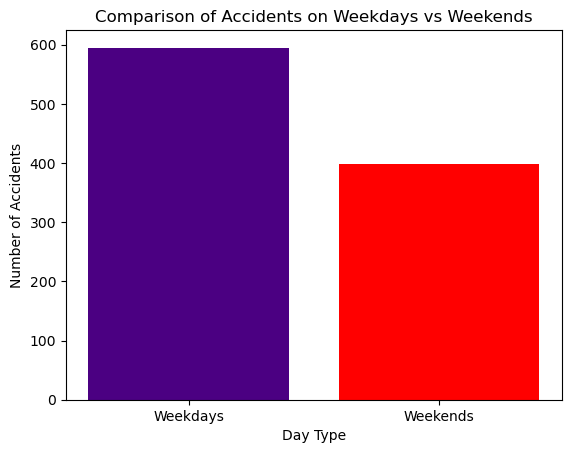

In [79]:
# 18. Are accidents more frequent on weekdays or weekends?

weekends = ['saturday', 'sunday']
weekday_accidents = dframe[~dframe['week_day'].isin(weekends)].shape[0]
weekend_accidents = dframe[dframe['week_day'].isin(weekends)].shape[0]


if weekday_accidents > weekend_accidents:
    print(f"Accidents are more frequent on weekdays with {weekday_accidents} accidents compared to {weekend_accidents} on weekends.")
else:
    print(f"Accidents are more frequent on weekends with {weekend_accidents} accidents compared to {weekday_accidents} on weekdays.")

categories = ['Weekdays', 'Weekends']
counts = [weekday_accidents, weekend_accidents]

plt.bar(categories, counts, color=['indigo', 'red'])
plt.title('Comparison of Accidents on Weekdays vs Weekends')
plt.xlabel('Day Type')
plt.ylabel('Number of Accidents')
plt.show()

# Statistical Analysis Questions

In this section, we will dive deeper into statistical analyses such as correlation, covariance, distribution analysis, and other insights. These questions help us understand how different variables in the dataset are related to each other and uncover important patterns.

##### 1. Which numeric variables show the strongest positive and negative correlations in the dataset?
We will analyze the correlation matrix of numeric variables to determine the strongest positive and negative correlations.

##### 2. Is there a covariance relationship between the number of vehicles involved and the number of people involved in accidents?
By calculating the covariance between the `vehicles_involved` and `people` columns, we will identify if there's a linear relationship between these two variables.

##### 3. What is the distribution of accident severity (fatalities, severe injuries) across different weather conditions?
We will visualize the distribution of accident severity by weather condition using box plots or bar charts to understand how weather affects accident outcomes.

##### 4. How does the time of day correlate with the number of accidents?
We will explore the correlation between accident frequency and the time of day to understand if accidents peak at certain times.

##### 5. Are accidents more severe on highways or city roads?
By comparing accident severity on highways versus city roads, we will determine if the type of road influences the severity of accidents.

##### 6. Are there clusters of accidents based on geographic location (latitude and longitude)?
We will use clustering algorithms or scatter plots to identify if accidents cluster in certain geographic areas based on their latitude and longitude.

##### 7. What are the outliers in accident severity (fatalities or severely injured)?
By analyzing box plots or z-scores, we will identify any outliers in accident severity, such as extreme numbers of fatalities or severe injuries.

##### 8. Do weekend accidents involve more vehicles on average compared to weekday accidents?
We will compare the average number of vehicles involved in accidents on weekends versus weekdays to see if there’s a difference.

##### 9. Is there a statistical relationship between road direction and accident severity?
We will analyze the relationship between road direction and accident severity by grouping data by `road_direction` and comparing the severity of accidents.

##### 10. What is the correlation between total injuries and the number of vehicles involved?
We will compute the correlation between `total_injured` and `vehicles_involved` to determine if accidents with more vehicles tend to result in more injuries.


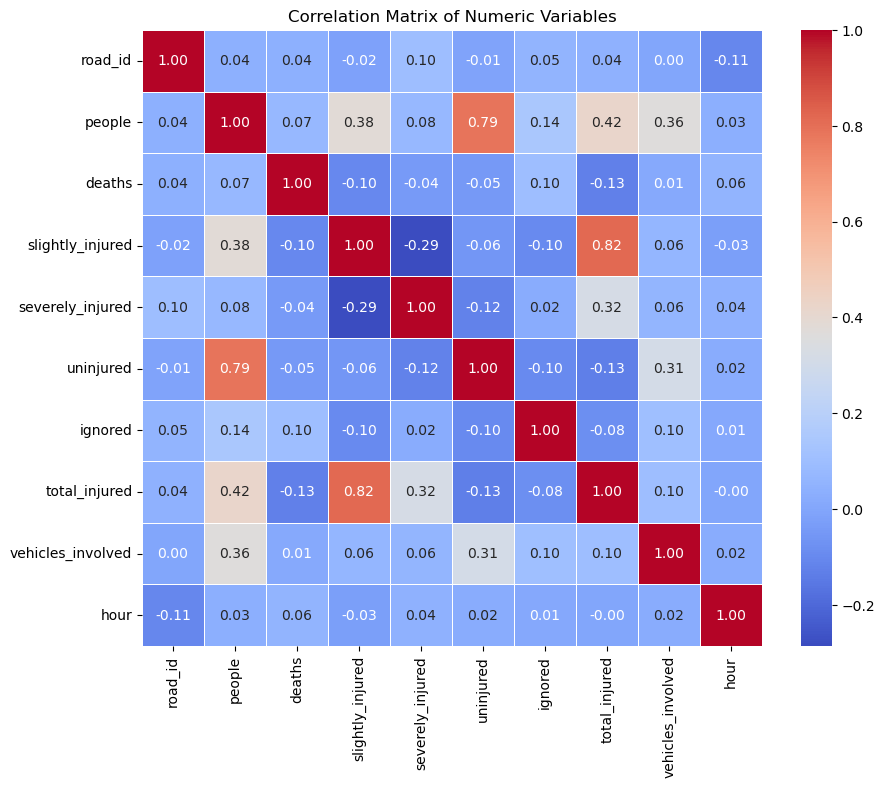

In [80]:
#1. Which numeric variables show the strongest positive and negative correlations in the dataset?

numeric_columns = dframe.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


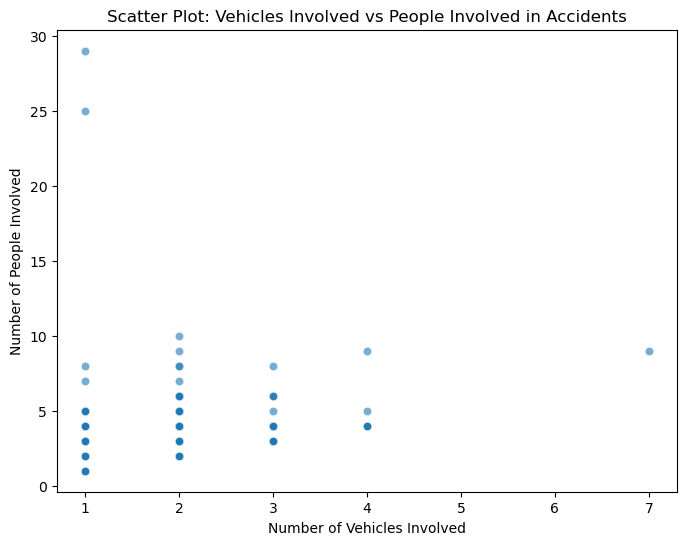

Covariance between vehicles involved and people involved: 0.37701612903225806


In [81]:
#2. Is there is a covariance relationship between the number of vehicles involved and the  number of people involved in the accident.?

# Calculate covariance between the number of vehicles and the number of people involved
covariance = dframe[['vehicles_involved', 'people']].cov().iloc[0, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=dframe['vehicles_involved'], y=dframe['people'], alpha=0.6)
plt.title('Scatter Plot: Vehicles Involved vs People Involved in Accidents')
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Number of People Involved')
plt.show()

print(f"Covariance between vehicles involved and people involved: {covariance}")



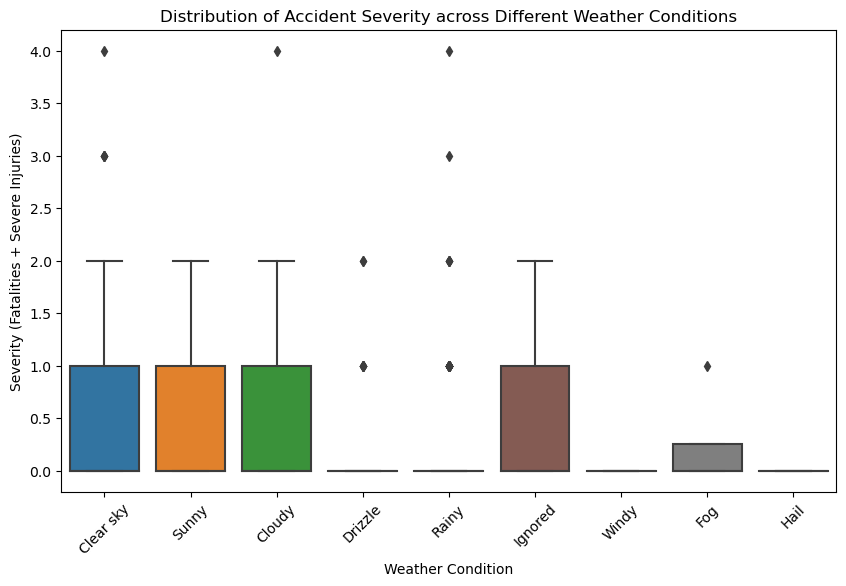

In [82]:
# 3. What is the distribution of accident severity (fatalities, severe injuries) across different weather conditions?


dframe['severity'] = dframe['deaths'] + dframe['severely_injured']

plt.figure(figsize=(10, 6))
sns.boxplot(x='wheather_condition', y='severity', data=dframe)
plt.title('Distribution of Accident Severity across Different Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Severity (Fatalities + Severe Injuries)')
plt.xticks(rotation=45)
plt.show()


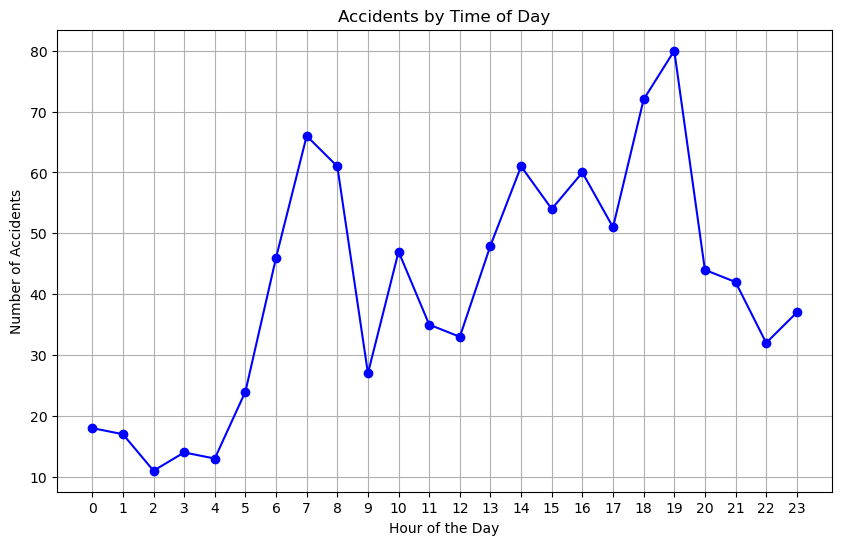

In [83]:
# 4. How does the time of day correlate with the number of accidents?


dframe['hour'] = dframe['datetime'].dt.hour

accidents_by_hour = dframe.groupby('hour').size()

plt.figure(figsize=(10, 6))
accidents_by_hour.plot(kind='line', marker='o', color='b')
plt.title('Accidents by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24, 1))
plt.grid(True)
plt.show()


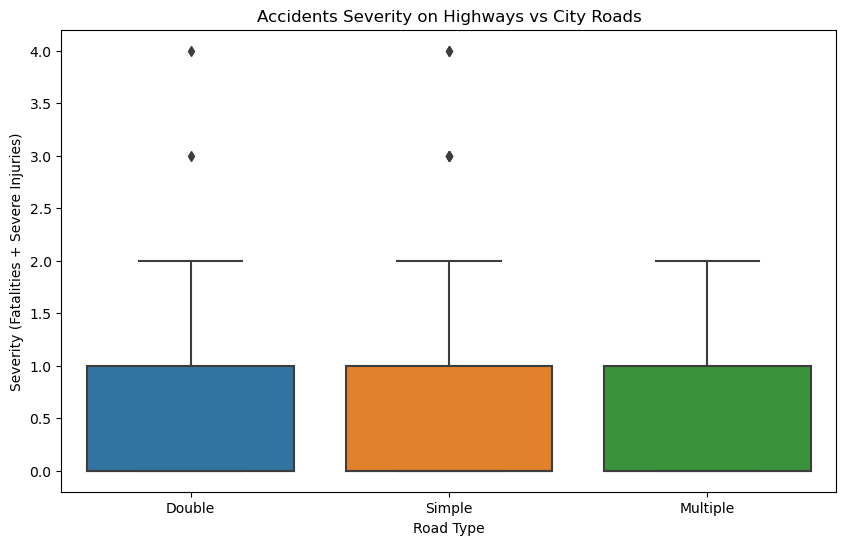

In [84]:
# 5. Are accidents more severe on highways or city roads?

plt.figure(figsize=(10, 6))
sns.boxplot(x='road_type', y='severity', data=dframe)
plt.title('Accidents Severity on Highways vs City Roads')
plt.xlabel('Road Type')
plt.ylabel('Severity (Fatalities + Severe Injuries)')
plt.show()


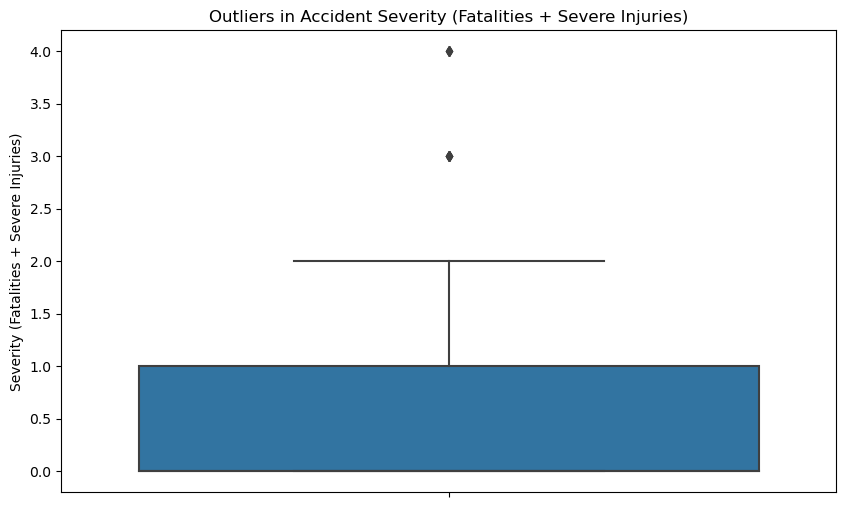

In [85]:
# 7. What are the outliers in accident severity (fatalities or severely injured)?

plt.figure(figsize=(10, 6))
sns.boxplot(y='severity', data=dframe)
plt.title('Outliers in Accident Severity (Fatalities + Severe Injuries)')
plt.ylabel('Severity (Fatalities + Severe Injuries)')
plt.show()


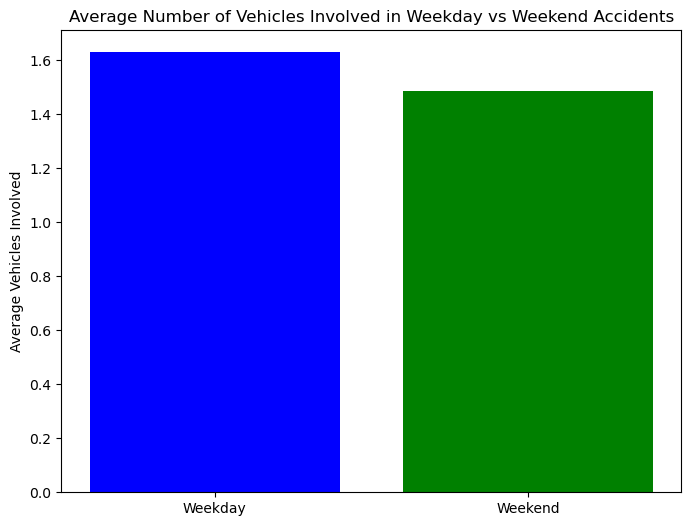

In [86]:
# 8. Do weekend accidents involve more vehicles on average compared to weekday accidents?

# Define weekends and weekdays
weekends = ['Saturday', 'Sunday']
dframe['week_day'] = dframe['datetime'].dt.day_name()

weekend_accidents = dframe[dframe['week_day'].isin(weekends)]
weekday_accidents = dframe[~dframe['week_day'].isin(weekends)]

avg_weekend_vehicles = weekend_accidents['vehicles_involved'].mean()
avg_weekday_vehicles = weekday_accidents['vehicles_involved'].mean()

plt.figure(figsize=(8, 6))
plt.bar(['Weekday', 'Weekend'], [avg_weekday_vehicles, avg_weekend_vehicles], color=['blue', 'green'])
plt.title('Average Number of Vehicles Involved in Weekday vs Weekend Accidents')
plt.ylabel('Average Vehicles Involved')
plt.show()


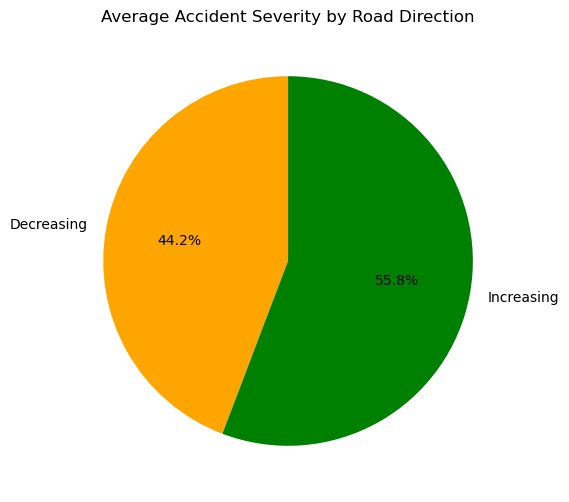

In [87]:
# 9. Is there a statistical relationship between road direction and accident severity?

# Pie chart showing accident severity for each road direction
road_direction_severity = dframe.groupby('road_direction')['severity'].mean()

# Plot a pie chart for accident severity by road direction
plt.figure(figsize=(8, 6))
road_direction_severity.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['orange', 'green'])
plt.title('Average Accident Severity by Road Direction')
plt.ylabel('')
plt.show()




Correlation between total injuries and vehicles involved: 0.09670770677991741


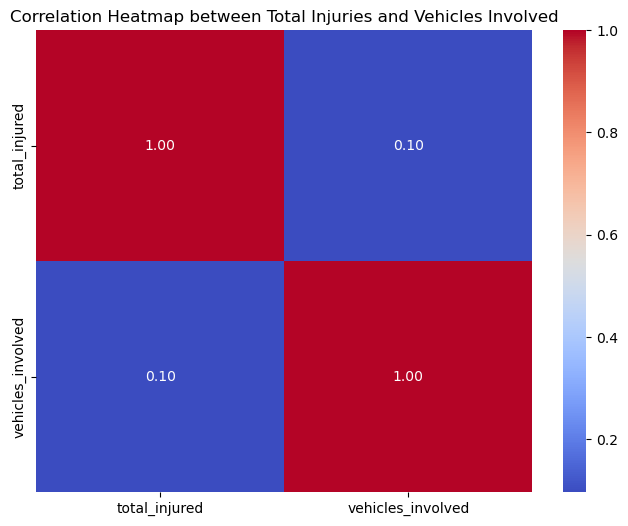

In [88]:
# 10. What is the correlation between total injuries and the number of vehicles involved?

# Correlation matrix calculation
correlation = dframe[['total_injured', 'vehicles_involved']].corr().iloc[0, 1]

print(f"Correlation between total injuries and vehicles involved: {correlation}")

# Heatmap of the correlation matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(dframe[['total_injured', 'vehicles_involved']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between Total Injuries and Vehicles Involved')
plt.show()


# SUMMARY

This project delves into a detailed exploration of accident-related data to uncover valuable insights that could contribute to improving road safety and guiding informed decision-making. The dataset captures a wide range of information, including accident severity, road and weather conditions, as well as the number of vehicles and people involved. By systematically analyzing this data, we aimed to identify patterns, relationships, and trends that reveal critical aspects of accident occurrences.

We began with basic exploratory techniques to understand the dataset, gradually moving into advanced statistical analyses, such as correlation and covariance, to explore how different variables are interconnected. For example, the analysis highlighted relationships between weather conditions, road types, and accident severity. Temporal patterns were also examined, shedding light on peak accident hours and differences between weekday and weekend accident trends.

Visualizations played a significant role in the analysis, offering clear, intuitive representations of complex data. Heatmaps, scatter plots, pie charts, box plots, and line graphs helped highlight key findings, such as which states and cities reported the most accidents, the most common causes of accidents, and how accident severity varied under different environmental conditions.

Through additional techniques like outlier detection and clustering, we uncovered unusual patterns and potential accident hotspots, providing valuable insights for targeted interventions. These findings can guide future road safety measures, such as improving infrastructure or focusing efforts on high-risk times and locations.

In essence, this project underscores the importance of data-driven approaches to understanding and addressing road safety challenges. The insights derived here not only help explain current trends but also lay the groundwork for predictive models and proactive safety strategies that could save lives and improve overall traffic conditions.